In [2]:
import pandas as pd

# Load the main dataset
main_dataset = pd.read_csv('/Users/riannaaalto/Downloads/final_dataset (1).csv')


In [4]:
from sklearn.model_selection import train_test_split

# Define the split ratios
train_ratio = 0.7  # 70% for training
validation_ratio = 0.15  # 15% for validation
test_ratio = 0.15  # 15% for testing

# Split the data
train_data, temp_data = train_test_split(main_dataset, test_size=1 - train_ratio, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=test_ratio / (test_ratio + validation_ratio), random_state=42)

# Reset the index for the split datasets
train_data.reset_index(drop=True, inplace=True)
validation_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)



### Save split dataset

In [5]:
train_data.to_csv('train_dataset.csv', index=False)
validation_data.to_csv('validation_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the datasets
train_data = pd.read_csv('train_dataset.csv')
validation_data = pd.read_csv('validation_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')

# Create feature matrix X and target variable y for each dataset
X_train = train_data.drop('action_taken', axis=1)
y_train = train_data['action_taken']

X_validation = validation_data.drop('action_taken', axis=1)
y_validation = validation_data['action_taken']

X_test = test_data.drop('action_taken', axis=1)
y_test = test_data['action_taken']


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111703 entries, 0 to 111702
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              111703 non-null  float64
 1   action_taken                              111703 non-null  int64  
 2   loan_type                                 111703 non-null  int64  
 3   lien_status                               111703 non-null  int64  
 4   reverse_mortgage                          111703 non-null  int64  
 5   open_end_line_of_credit                   111703 non-null  int64  
 6   loan_amount                               111703 non-null  int64  
 7   combined_loan_to_value_ratio              111703 non-null  int64  
 8   interest_rate                             111703 non-null  float64
 9   total_loan_costs                          111703 non-null  int64  
 10  origination_charges 

In [19]:
train_data.isnull().sum()

census_tract                                0
action_taken                                0
loan_type                                   0
lien_status                                 0
reverse_mortgage                            0
open_end_line_of_credit                     0
loan_amount                                 0
combined_loan_to_value_ratio                0
interest_rate                               0
total_loan_costs                            0
origination_charges                         0
loan_term                                   0
negative_amortization                       0
interest_only_payment                       0
balloon_payment                             0
other_nonamortizing_features                0
property_value                              0
occupancy_type                              0
manufactured_home_secured_property_type     0
manufactured_home_land_property_interest    0
total_units                                 0
income                            

In [2]:
# Step 1: Data Preprocessing
# Apply SMOTE to address class imbalance in the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(train_data.drop('action_taken', axis=1), train_data['action_taken'])


In [3]:
# Apply Min-Max scaling to all datasets (training, validation, and test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(validation_data.drop('action_taken', axis=1))
X_test = scaler.transform(test_data.drop('action_taken', axis=1))
y_validation = validation_data['action_taken']
y_test = test_data['action_taken']

### Model Selection:

In [4]:
# Baseline Model: Logistic Regression
logistic_model = LogisticRegression()

# Complex Model: Random Forest
random_forest_model = RandomForestClassifier()

# Naive Bayes:
naive_bayes_model = GaussianNB()

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()




### Hyperparameter tuning

In [23]:
# - Use GridSearchCV to optimize hyperparameters for each model

# Hyperparameter tuning for Logistic Regression
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Use 'l2' penalty instead of 'l1'
}
logistic_grid_search = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
logistic_grid_search.fit(train_data.drop('action_taken', axis=1), train_data['action_taken'])

print("Logistic Regression - Best Parameters: ", logistic_grid_search.best_params_)
print("Logistic Regression - Best Accuracy Score: ", logistic_grid_search.best_score_)

# Hyperparameter tuning for Random Forest
random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_params, cv=5, scoring='accuracy')
random_forest_grid_search.fit(train_data.drop('action_taken', axis=1), train_data['action_taken'])

print("Random Forest - Best Parameters: ", random_forest_grid_search.best_params_)
print("Random Forest - Best Accuracy Score: ", random_forest_grid_search.best_score_)

# Since Naive Bayes does not have hyperparameters to tune, 

# Hyperparameter tuning for K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid_search = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid_search.fit(train_data.drop('action_taken', axis=1), train_data['action_taken'])

print("KNN - Best Parameters: ", knn_grid_search.best_params_)
print("KNN - Best Accuracy Score: ", knn_grid_search.best_score_)



Logistic Regression - Best Parameters:  {'C': 0.001, 'penalty': 'l2'}
Logistic Regression - Best Accuracy Score:  0.518884900226196
Random Forest - Best Parameters:  {'max_depth': 20, 'n_estimators': 300}
Random Forest - Best Accuracy Score:  0.9953985175735248
KNN - Best Parameters:  {'n_neighbors': 9, 'weights': 'uniform'}
KNN - Best Accuracy Score:  0.5712737415826641


### Model Training

In [17]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:

from imblearn.over_sampling import SMOTE
# Model Training
# Train the selected models with the best hyperparameters

# Apply SMOTE to address class imbalance in the training data (again, for the final testing)
smote = SMOTE(sampling_strategy='auto')  # You can adjust the sampling strategy as per your needs.
X_train, y_train = smote.fit_resample(train_data.drop('action_taken', axis=1), train_data['action_taken'])


# Logistic Regression model with best hyperparameters
best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_model.fit(X_train, y_train)

# Random Forest model with best hyperparameters
best_random_forest_model = random_forest_grid_search.best_estimator_
best_random_forest_model.fit(X_train, y_train)

# K-Nearest Neighbors (KNN) model with best hyperparameters
best_knn_model = knn_grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Naive Bayes model
naive_bayes_model.fit(X_train, y_train)




GaussianNB()

### Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


X_val = validation_data.drop('action_taken', axis=1)
y_val = validation_data['action_taken']

# Predict with the Logistic Regression model
y_val_pred_logistic = best_logistic_model.predict(X_val)
accuracy_logistic = accuracy_score(y_val, y_val_pred_logistic)
classification_report_logistic = classification_report(y_val, y_val_pred_logistic)
roc_auc_logistic = roc_auc_score(y_val, y_val_pred_logistic)

print("Logistic Regression Model Validation Results:")
print("Accuracy: {:.2f}%".format(accuracy_logistic * 100))
print(classification_report_logistic)
print("ROC AUC Score: {:.4f}".format(roc_auc_logistic))

# Predict with the Random Forest model
y_val_pred_random_forest = best_random_forest_model.predict(X_val)
accuracy_random_forest = accuracy_score(y_val, y_val_pred_random_forest)
classification_report_random_forest = classification_report(y_val, y_val_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_val, y_val_pred_random_forest)

print("\nRandom Forest Model Validation Results:")
print("Accuracy: {:.2f}%".format(accuracy_random_forest * 100))
print(classification_report_random_forest)
print("ROC AUC Score: {:.4f}".format(roc_auc_random_forest))

# Predict with the K-Nearest Neighbors (KNN) model
y_val_pred_knn = best_knn_model.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
classification_report_knn = classification_report(y_val, y_val_pred_knn)
roc_auc_knn = roc_auc_score(y_val, y_val_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Validation Results:")
print("Accuracy: {:.2f}%".format(accuracy_knn * 100))
print(classification_report_knn)
print("ROC AUC Score: {:.4f}".format(roc_auc_knn))

# Predict with the Naive Bayes model
y_val_pred_naive_bayes = naive_bayes_model.predict(X_val)
accuracy_naive_bayes = accuracy_score(y_val, y_val_pred_naive_bayes)
classification_report_naive_bayes = classification_report(y_val, y_val_pred_naive_bayes)
roc_auc_naive_bayes = roc_auc_score(y_val, y_val_pred_naive_bayes)

print("\nNaive Bayes Model Validation Results:")
print("Accuracy: {:.2f}%".format(accuracy_naive_bayes * 100))
print(classification_report_naive_bayes)
print("ROC AUC Score: {:.4f}".format(roc_auc_naive_bayes))


Logistic Regression Model Validation Results:
Accuracy: 53.94%
              precision    recall  f1-score   support

           1       0.52      0.60      0.56     11604
           3       0.56      0.48      0.52     12333

    accuracy                           0.54     23937
   macro avg       0.54      0.54      0.54     23937
weighted avg       0.54      0.54      0.54     23937

ROC AUC Score: 0.5412

Random Forest Model Validation Results:
Accuracy: 99.46%
              precision    recall  f1-score   support

           1       1.00      0.99      0.99     11604
           3       0.99      1.00      0.99     12333

    accuracy                           0.99     23937
   macro avg       0.99      0.99      0.99     23937
weighted avg       0.99      0.99      0.99     23937

ROC AUC Score: 0.9944

K-Nearest Neighbors (KNN) Model Validation Results:
Accuracy: 57.17%
              precision    recall  f1-score   support

           1       0.56      0.59      0.57     11604
  

the Random Forest model stands out with the highest accuracy and strong precision, recall, F1-scores, and ROC AUC score. The other models, including Logistic Regression, KNN, and Naive Bayes, have lower accuracy and somewhat lower precision, recall, and F1-scores. 

### Checking for overfitting and underfitting:

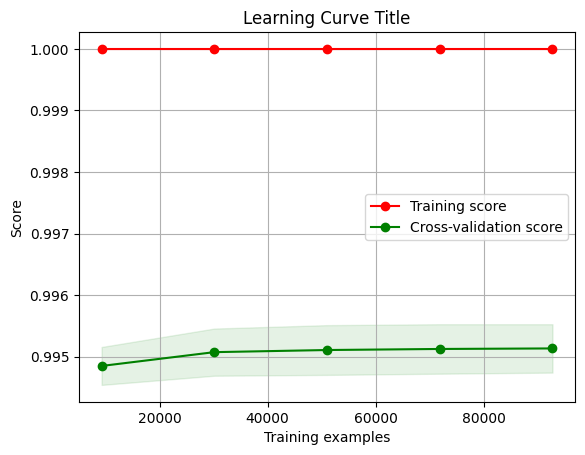

In [26]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

# Define your machine learning estimator
estimator = best_random_forest_model

# Call the plot_learning_curve function
plot_learning_curve(estimator, "Learning Curve Title", X_train, y_train, cv=5, n_jobs=-1)

# Display the learning curve plot
plt.show()



The key observation here is the high training score. While a high cross-validation score is desirable, the large gap between the training and cross-validation scores indicates potential overfitting.

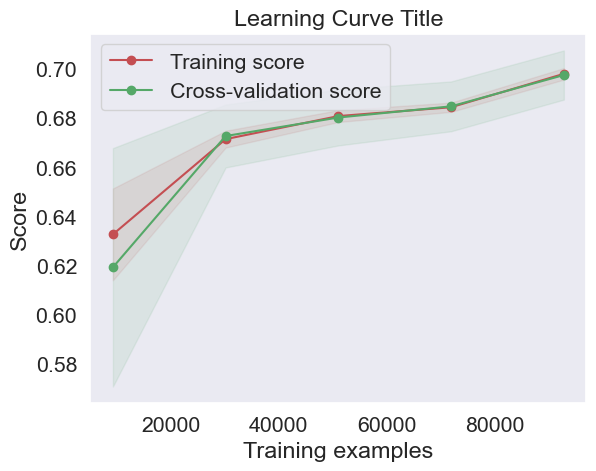

In [43]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

# Define your machine learning estimator
estimator = best_logistic_model

# Call the plot_learning_curve function
plot_learning_curve(estimator, "Learning Curve Title", X_train, y_train, cv=5, n_jobs=-1)

# Display the learning curve plot
plt.show()



The fact that the training score and cross-validation score are close to each other is a positive sign. It indicates that your model generalizes well to new, unseen data, as its performance on validation data is comparable to its performance on training data.

In [27]:
#Cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Random Forest):", scores)


Cross-Validation Scores (Random Forest): [0.99538495 0.99473798 0.99478088 0.99577295 0.99499655]


### Model Testing on Test Data

In [35]:
X_test = test_data.drop('action_taken', axis=1)
y_test = test_data['action_taken']


#Step 6: Model Testing
# Assess the final model's performance on the test set

# Apply SMOTE to address class imbalance in the training data (again, for the final testing)
X_train, y_train = smote.fit_resample(train_data.drop('action_taken', axis=1), train_data['action_taken'])
X_test, y_test = smote.fit_resample(test_data.drop('action_taken', axis=1), test_data['action_taken'])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(test_data.drop('action_taken', axis=1))
y_test = test_data['action_taken']

best_logistic_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)
best_knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

#-------
# Predict with the Logistic Regression model
# Make predictions on the test data
y_test_pred_random_forest = best_random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_test_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_test_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_test_pred_random_forest)


print("Logistic Regression Model Test Results:")
print("Accuracy: {:.2f}%".format(accuracy_logistic * 100))
print(classification_report_logistic)
print("ROC AUC Score: {:.4f}".format(roc_auc_logistic))

# Predict with the Random Forest model
y_test_pred_random_forest = best_random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_test_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_test_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_test_pred_random_forest)

print("\nRandom Forest Model Test Results:")
print("Accuracy: {:.2f}%".format(accuracy_random_forest * 100))
print(classification_report_random_forest)
print("ROC AUC Score: {:.4f}".format(roc_auc_random_forest))

# Predict with the K-Nearest Neighbors (KNN) model
y_test_pred_knn = best_knn_model.predict(X_val)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
classification_report_knn = classification_report(y_test, y_test_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Test Results:")
print("Accuracy: {:.2f}%".format(accuracy_knn * 100))
print(classification_report_knn)
print("ROC AUC Score: {:.4f}".format(roc_auc_knn))

# Predict with the Naive Bayes model
y_test_pred_naive_bayes = naive_bayes_model.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_test_pred_naive_bayes)
classification_report_naive_bayes = classification_report(y_test, y_test_pred_naive_bayes)
roc_auc_naive_bayes = roc_auc_score(y_test, y_test_pred_naive_bayes)

print("\nNaive Bayes Model Test Results:")
print("Accuracy: {:.2f}%".format(accuracy_naive_bayes * 100))
print(classification_report_naive_bayes)
print("ROC AUC Score: {:.4f}".format(roc_auc_naive_bayes))

Logistic Regression Model Test Results:
Accuracy: 53.94%
              precision    recall  f1-score   support

           1       0.52      0.60      0.56     11604
           3       0.56      0.48      0.52     12333

    accuracy                           0.54     23937
   macro avg       0.54      0.54      0.54     23937
weighted avg       0.54      0.54      0.54     23937

ROC AUC Score: 0.5412

Random Forest Model Test Results:
Accuracy: 99.49%
              precision    recall  f1-score   support

           1       1.00      0.99      0.99     11590
           3       0.99      1.00      1.00     12347

    accuracy                           0.99     23937
   macro avg       1.00      0.99      0.99     23937
weighted avg       0.99      0.99      0.99     23937

ROC AUC Score: 0.9948


/Users/riannaaalto/opt/anaconda3/envs/Agile_project/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



K-Nearest Neighbors (KNN) Model Test Results:
Accuracy: 48.42%
              precision    recall  f1-score   support

           1       0.48      1.00      0.65     11590
           3       0.00      0.00      0.00     12347

    accuracy                           0.48     23937
   macro avg       0.24      0.50      0.33     23937
weighted avg       0.23      0.48      0.32     23937

ROC AUC Score: 0.5000

Naive Bayes Model Test Results:
Accuracy: 74.94%
              precision    recall  f1-score   support

           1       0.66      1.00      0.79     11590
           3       1.00      0.52      0.68     12347

    accuracy                           0.75     23937
   macro avg       0.83      0.76      0.74     23937
weighted avg       0.83      0.75      0.74     23937

ROC AUC Score: 0.7571


/Users/riannaaalto/opt/anaconda3/envs/Agile_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riannaaalto/opt/anaconda3/envs/Agile_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riannaaalto/opt/anaconda3/envs/Agile_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

#### In summary, the Random Forest and Naive Bayes models maintain their better performance on the test dataset compared to Logistic Regression and K-Nearest Neighbors. 

### Model Interpretation:

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler


X_test = test_data.drop('action_taken', axis=1)
y_test = test_data['action_taken']

# Apply SMOTE to address class imbalance in the training data (again, for the final testing)
X_train, y_train = smote.fit_resample(train_data.drop('action_taken', axis=1), train_data['action_taken'])
X_test, y_test = smote.fit_resample(test_data.drop('action_taken', axis=1), test_data['action_taken'])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(test_data.drop('action_taken', axis=1))
y_test = test_data['action_taken']

best_logistic_model.fit(X_train, y_train)
best_random_forest_model.fit(X_train, y_train)
best_knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

#------

        
# Logistic Regression predictions on the test data

y_pred = best_logistic_model.predict_proba(X_test)[:, 1]
        
# Calculate and print the ROC AUC score
roc_auc_lr = roc_auc_score(y_test, y_pred)
print("LogisticRegression roc_auc:", roc_auc_lr)
print('*' * 20)

# Train the model on the selected features
best_random_forest_model.fit(X_train, y_train)
        
# Random Forest  predictions on the test data
y_pred = best_random_forest_model.predict_proba(X_test)[:, 1]
        
# Calculate and print the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred)
print("Random Forest roc_auc:", roc_auc_rf)
print('*' * 20)

# KNN  predictions on the test data
y_pred = best_knn_model.predict_proba(X_test)[:, 1]
        
# Calculate and print the ROC AUC score
roc_auc_knn = roc_auc_score(y_test, y_pred)
print("KNN roc_auc:", roc_auc_knn)
print('*' * 20)

# Naive Bayes  predictions on the test data
y_pred = naive_bayes_model.predict_proba(X_test)[:, 1]
        
# Calculate and print the ROC AUC score
roc_auc_nb = roc_auc_score(y_test, y_pred)
print("Naive Bayes roc_auc:", roc_auc_nb)
print('*' * 20)

LogisticRegression roc_auc: 0.768598401989969
********************
Random Forest roc_auc: 0.9983626752800263
********************
KNN roc_auc: 0.9633280149722858
********************
Naive Bayes roc_auc: 0.9970579531079045
********************


In [38]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def roc_curve__confusion_matrix(model, pos_label=1):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test)[:, 1]
    y_prob_train = model.predict_proba(X_train)[:, 1]
    prediction = model.predict(X_test)

    # Calculate ROC curves
    fpr_test, tpr_test, thresholds = roc_curve(y_test, y_prob_test, pos_label=pos_label)
    fpr_train, tpr_train, thresholds1 = roc_curve(y_train, y_prob_train, pos_label=pos_label)

    # Calculate AUC score
    roc_auc_test = auc(fpr_test, tpr_test)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Calculate confusion matrix for the test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)')

    plt.tight_layout()
    plt.show()


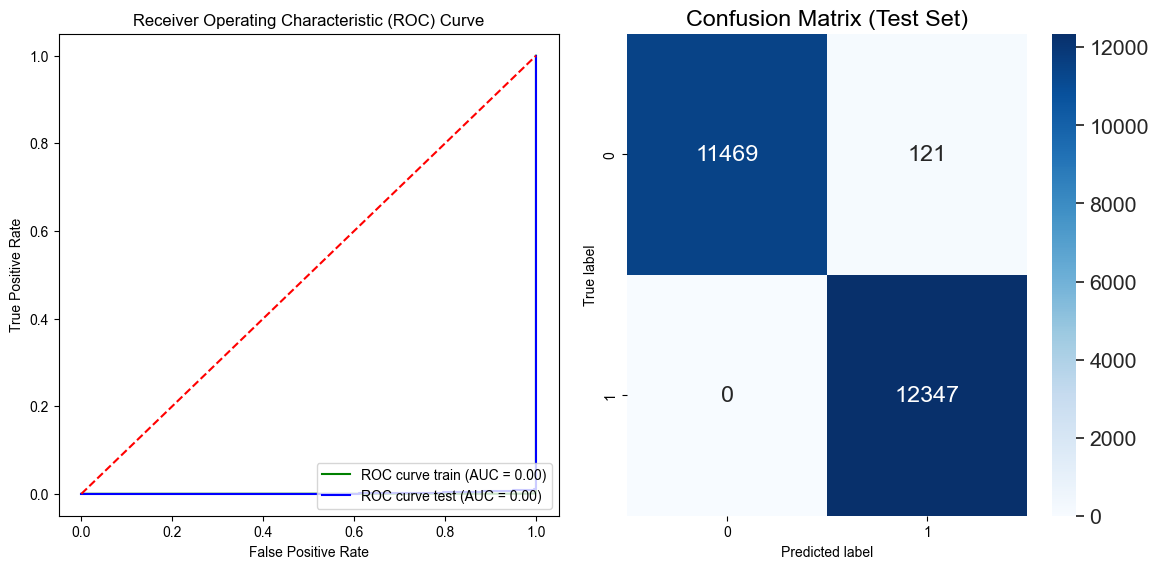

In [39]:
roc_curve__confusion_matrix(best_random_forest_model)

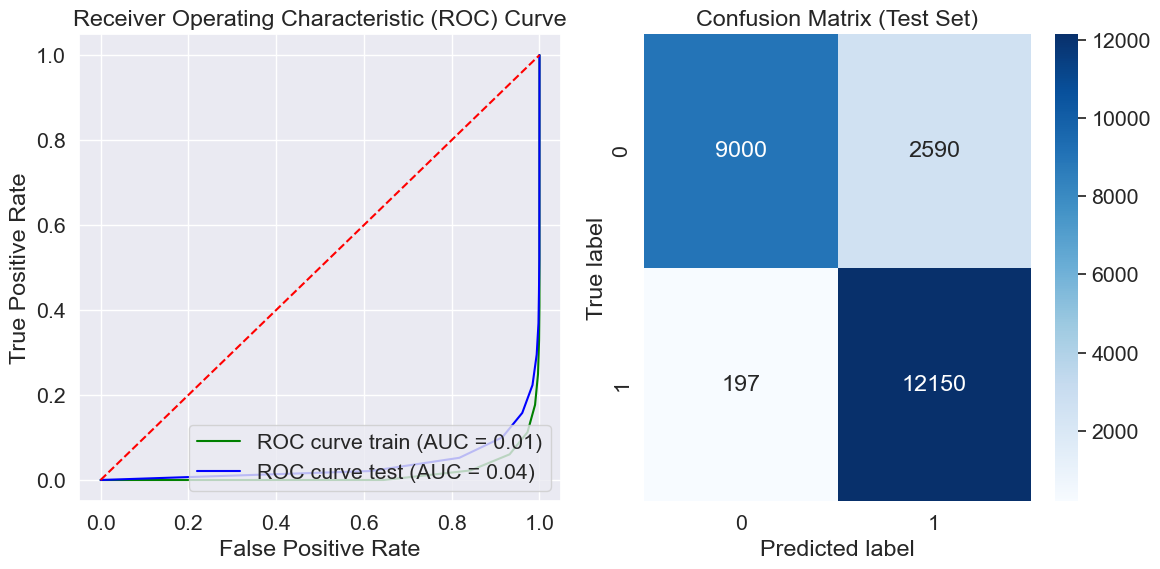

In [40]:
roc_curve__confusion_matrix(best_knn_model)

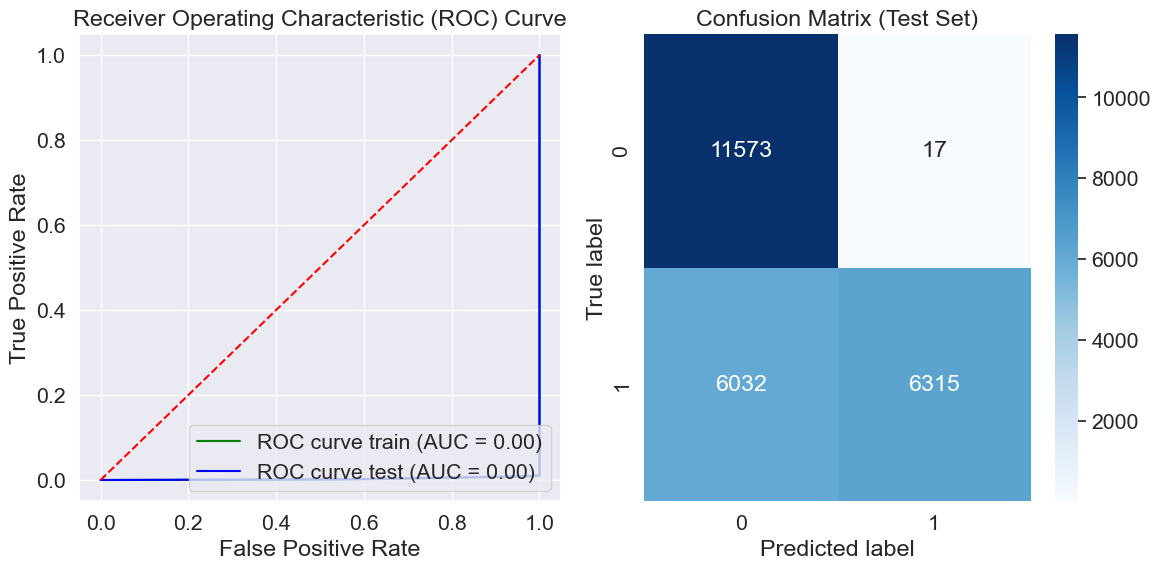

In [41]:
roc_curve__confusion_matrix(naive_bayes_model)

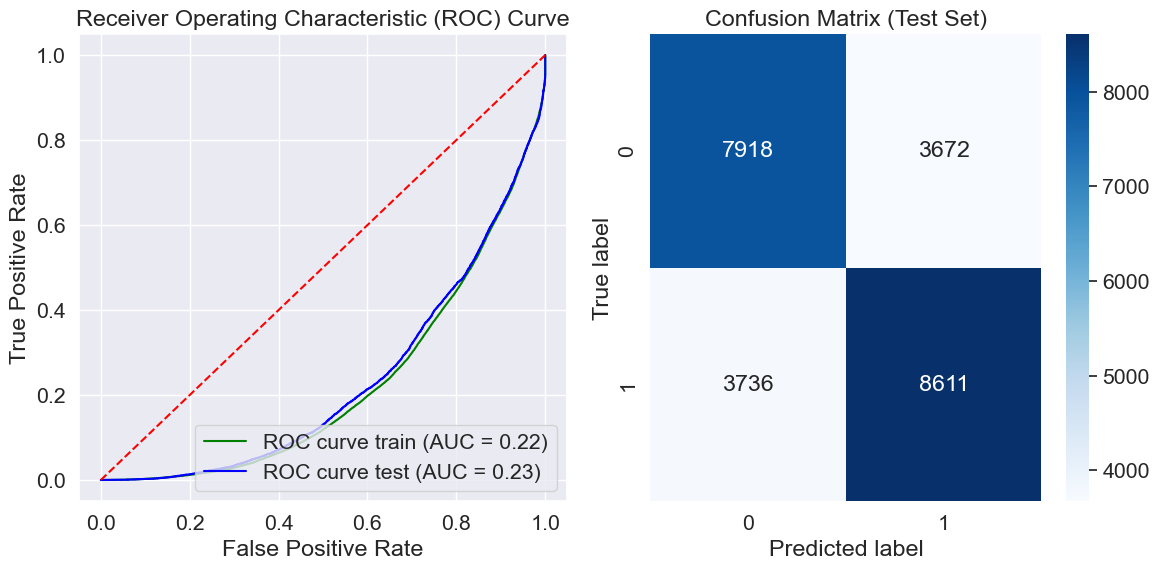

In [42]:
roc_curve__confusion_matrix(best_logistic_model)

### Hyperparameter tuning Logistic Regression:

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Expanded parameter grid
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'max_iter': [100, 500, 1000, 2000],  # Increase the max_iter values
}

logistic_model = LogisticRegression()

# Perform grid search
logistic_grid_search = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', n_jobs=-1)
logistic_grid_search.fit(train_data.drop('action_taken', axis=1), train_data['action_taken'])

print("Logistic Regression - Best Parameters: ", logistic_grid_search.best_params_)
print("Logistic Regression - Best Accuracy Score: ", logistic_grid_search.best_score_)


Logistic Regression - Best Parameters:  {'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression - Best Accuracy Score:  0.518884900226196
